In [1]:
import pandas as pd

In [2]:
path ='https://raw.githubusercontent.com/CODESTUDIO-GIT/endtoend-ml-projects/master/hr_employee_churn_data.csv'
df = pd.read_csv(path)


In [ ]:
df.to_csv('hr_employee.csv',index=False)

In [42]:
df = pd.read_csv('hr_employee.csv')

# Exploring the data

In [43]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [52]:
df.tail()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
14994,14995,0.40,0.57,2,151,3,0,0,low,1
14995,14996,0.37,0.48,2,160,3,0,0,low,1
14996,14997,0.37,0.53,2,143,3,0,0,low,1
14997,14998,0.11,0.96,6,280,4,0,0,low,1
14998,14999,0.37,0.52,2,158,3,0,0,low,1


In [49]:
df.time_spend_company.unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [50]:
df.Work_accident.unique()

array([0, 1], dtype=int64)

In [51]:
df.promotion_last_5years.unique()

array([0, 1], dtype=int64)

In [44]:
df.shape

(14999, 10)

In [45]:
df.isnull().sum().sum()

2

In [46]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [7]:
df.tail()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
14994,14995,0.40,0.57,2,151,3,0,0,low,1
14995,14996,0.37,0.48,2,160,3,0,0,low,1
14996,14997,0.37,0.53,2,143,3,0,0,low,1
14997,14998,0.11,0.96,6,280,4,0,0,low,1
14998,14999,0.37,0.52,2,158,3,0,0,low,1




So we can see here 

rows - 14999,
columns - 10,
Total-null-values - 2 in satisfaction_level
Categorical feature - 1 is salary

# Purpose

In the above Exploration,

1. we can analyze that it is a Classification Problem,
2. Our dependent feature is left 
3. Independent feature are remaninings

# Data PreProcessing 


1. fill the null values with median.
2. Convert the categorical values into numeric values.
3. Drop the empid feature

In [8]:
df.satisfaction_level.fillna(0,inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder

number =LabelEncoder()
df["salary"]=number.fit_transform(df["salary"].astype('str'))
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,1,1
1,2,0.80,0.86,5,262,6,0,0,2,1
2,3,0.11,0.88,7,272,4,0,0,2,1
3,4,0.72,0.87,5,223,5,0,0,1,1
4,5,0.37,0.52,2,159,3,0,0,1,1


In [10]:
df = df.drop('empid',axis=1)

In [11]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,2,1
2,0.11,0.88,7,272,4,0,0,2,1
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,1
14995,0.37,0.48,2,160,3,0,0,1,1
14996,0.37,0.53,2,143,3,0,0,1,1
14997,0.11,0.96,6,280,4,0,0,1,1


# Visualizing the Data


1. Display with countplot
2. Find the correlation

<IPython.core.display.Javascript object>

C:\Users\Trapti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left', ylabel='count'>

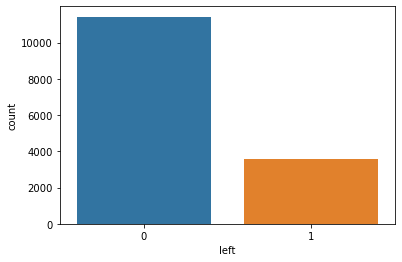

In [12]:
sns.countplot(df['left'])

In [13]:
corr_matrix = abs(df.corr())
print(corr_matrix["left"].sort_values(ascending=False))

left                     1.000000
satisfaction_level       0.388617
Work_accident            0.154622
time_spend_company       0.144822
average_montly_hours     0.071287
promotion_last_5years    0.061788
number_project           0.023787
last_evaluation          0.006567
salary                   0.001294
Name: left, dtype: float64


# Applying Classification Models

In [14]:
X = df.drop('left',axis=1)
y = df.left

In [15]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

# Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state =0)

In [17]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()
rfr.fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = rfr.predict(X_test)

accuracy_score(y_test,y_pred_rfr)

0.992

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rfr))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2299
           1       0.99      0.98      0.98       701

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [27]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

1.0
0.992


# Making Pickle File

In [21]:
import pickle
filename = 'hr_employee.pkl'
pickle.dump(rfr, open(filename, 'wb'))

In [22]:
model = open("hr_employee.pkl","rb")
model = pickle.load(model) 

In [56]:
result = model.predict([[0.55, #satisfaction_level
                0.96, #last_evaluation
                3, #number_project
                194, #average_montly_hours
                3, #time_spend_company
                0, #Work_accident
                0, #promotion_last_5years
                2 #salary
               ]])
re = model.predict([[ 0.23,0.35,3,195,3,0, 1, 0, ]])

if re[0] == 1:
    print('left')
elif re[0] == 0:
    print('noleft')

noleft


In [53]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
1670,0.44,0.57,2,141,3,0,0,2
13378,0.55,0.96,3,194,3,0,0,2
10233,0.72,0.67,5,210,2,0,0,2
4719,0.96,0.75,4,177,2,0,0,1
7003,0.96,0.54,3,198,3,0,0,1
...,...,...,...,...,...,...,...,...
14035,0.75,0.79,4,263,3,0,1,2
8469,0.92,0.49,5,178,2,1,0,2
12453,0.37,0.54,2,145,3,0,0,2
9431,0.52,0.61,4,163,2,0,0,1


In [54]:
y_test

1670     1
13378    0
10233    0
4719     0
7003     0
        ..
14035    0
8469     0
12453    1
9431     0
4202     0
Name: left, Length: 3000, dtype: int64